In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [9]:
pd.options.display.max_rows = 4000
pd.options.display.max_colwidth = 1000

In [10]:
df = pd.read_excel("./data/reddcoin.xlsx")
df = df[['ID', 'Text']]
df.head(2)

ID  \
0  1057491321504612353   
1  1057489020467458055   

                                                                                                                  Text  
0                                        RT @RedcoinNL: Whats happend? #RDD #Reddcoin #Bitcoin https://t.co/HmOwqvcjXk  
1  RT @reddcoinnews: Question on https://t.co/w093wCpr9j and staking via /r/reddCoin https://t.co/I0aptvCDA5 #reddcoin

In [14]:
df

ID  \
0    1057491321504612353   
1    1057489020467458055   
2    1057486859419467783   
3    1057482343072628736   
4    1057482322860273666   
5    1057474487073964033   
6    1057469334786920448   
7    1057462972866383872   
8    1057461367429464064   
9    1057461265008779264   
10   1057457040673501184   
11   1057453375904612353   
12   1057452118074970112   
13   1057451631678312448   
14   1057451629149110273   
15   1057450492198940672   
16   1057442316409950208   
17   1057431785838120961   
18   1057431737888919552   
19   1057427461162524672   
20   1057427307089088512   
21   1057424439355289600   
22   1057420932162183168   
23   1057418440066166785   
24   1057418177842421760   
25   1057418136054652928   
26   1057416964682014725   
27   1057416870737969152   
28   1057414891496239104   
29   1057413980136923136   
30   1057413194996727808   
31   1057411891675324422   
32   1057409057789755393   
33   1057394934205026305   
34   1057394761773076481   
35   1057394523779817477   
36   1057386349500792832   
37   1057386301266255878   
38   1057384161965568000   
39   1057383137171271680   
40   1057379434263703555   
41   1057375043850854400   
42   1057372910866841600   
43   1057370745679106048   
44   1057369780590657536   
45   1057366123421843459   
46   1057366034955538432   
47   1057365300235198465   
48   1057364155689299968   
49   1057363542662438914   
50   1057359384504877061   
51   1057357847388975105   
52   1057357520870801409   
53   1057356742303117318   
54   1057356444268408832   
55   1057355771850088448   
56   1057355558997639170   
57   1057347650142568448   
58   1057347464477507584   
59   1057346171964964864   
60   1057345059065155584   
61   1057343703159836673   
62   1057342968942772224   
63   1057342870036799488   
64   1057338986790821889   
65   1057338451115327488   
66   1057331950350815232   
67   1057331436724744192   
68   1057331429670117377   
69   1057330831759499264   
70   1057330505635352576   
71   1057330481857994752   
72   1057330186084122624   
73   1057329279913025536   
74   1057326953982656512   
75   1057324602488164353   
76   1057324458287996928   
77   1057323979269001216   
78   1057323845420367872   
79   1057321728991526913   
80   1057320518292922369   
81   1057318733943779329   
82   1057318675542360064   
83   1057317720662913024   
84   1057317370522488833   
85   1057316526762745856   
86   1057315896044277760   
87   1057315859079880704   
88   1057315634479022080   
89   1057315565327540224   
90   1057315384926396418   
91   1057315268429516800   
92   1057315172958724097   
93   1057315111201882123   
94   1057314958646620160   
95   1057310947377737728   
96   1057310378147921923   
97   1057306322071404544   
98   1057304056589361160   
99   1057302260156383232   
100  1057301138838450176   
101  1057296670566825989   
102  1057295882234793990   
103  1057295651791355905   
104  1057294301322006530   
105  1057293651250835457   
106  1057293621647425536   
107  1057293557554429952   
108  1057293483222781952   
109  1057292983106789378   
110  1057290684489719808   
111  1057289778184536072   
112  1057288977185693699   
113  1057288957707333633   
114  1057288566261321728   
115  1057288521067716609   
116  1057287569405165569   
117  1057286429573701633   
118  1057285916337815553   
119  1057285259782512642   
120  1057284576731525120   
121  1057283277592186881   
122  1057282682986680321   
123  1057282408855281664   
124  1057280518214090752   
125  1057280508579799040   
126  1057277388051034114   
127  1057276446085865474   
128  1057275308401782785   
129  1057273663505031168   
130  1057272182168932353   
131  1057270084937367554   
132  1057263203196063744   
133  1057260398959845378   
134  1057258284451856385   
135  1057258192240107520   
136  1057257729092399104   
137  1057252544441999361   
138  1057250778421686272   
139  1057245710809088002   
140  1057231885242392577   
141  1057207600243245056   
142  1057207364049

In [15]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
documents = [TaggedDocument(list(df.loc[i,'Text']),[i]) for i in range(0,df.shape[0])]

In [25]:
import multiprocessing
cores = multiprocessing.cpu_count()
model_DM = Doc2Vec(documents, vector_size=50, window=8, min_count=1, sample=1e-4, negative=5, workers=cores,  dm=1, dm_concat=1 )
model_DBOW = Doc2Vec(documents, vector_size=50, window=8, min_count=1, sample=1e-4, negative=5, workers=cores, dm=0)

In [27]:
model_DM.docvecs[2]

array([-9.1599505e-03, -7.4629365e-03, -4.7956435e-03,  4.5037675e-03,
        9.4557181e-03, -8.4647778e-03, -9.1510676e-03,  4.6478086e-03,
       -3.9466941e-03,  5.6848582e-03, -7.1536000e-03,  4.3032644e-03,
       -6.4021652e-03, -4.2808042e-03, -6.3640554e-03, -9.3315514e-03,
       -3.4494682e-03,  9.5492913e-05, -6.5831360e-03,  5.8153151e-03,
       -6.6825105e-03, -4.2644921e-03,  2.5836241e-03,  5.3999359e-03,
       -1.0388357e-03, -3.2935344e-04, -3.0963053e-03,  6.1175134e-03,
       -7.2861271e-04,  1.6782903e-03,  8.1179673e-03, -8.0714999e-03,
       -6.2849899e-03, -6.9736694e-03,  7.6992265e-03, -4.5723394e-03,
        7.8547802e-03, -2.5394605e-03, -8.3015906e-03, -1.9285294e-03,
       -6.2783589e-03, -5.5308449e-03,  8.6287251e-03, -3.6670757e-03,
        8.3919009e-03,  8.1284177e-03, -2.1241808e-03, -6.2737837e-03,
        3.2250488e-03,  9.9723358e-03], dtype=float32)

In [28]:
len(model_DM.docvecs)

887

# Sentiment Tweets

In [46]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
tweets = pd.read_csv('./data/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

In [47]:
tweets.head()

target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user  \
0  _TheSpecialOne_   
1    scotthamilton   
2         mattycus   
3          ElleCTF   
4           Karoli   

                                                                                                                  text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
1      is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!  
2                            @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds  
3                                                                      my whole body feels itchy and like its on fire   
4      @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.

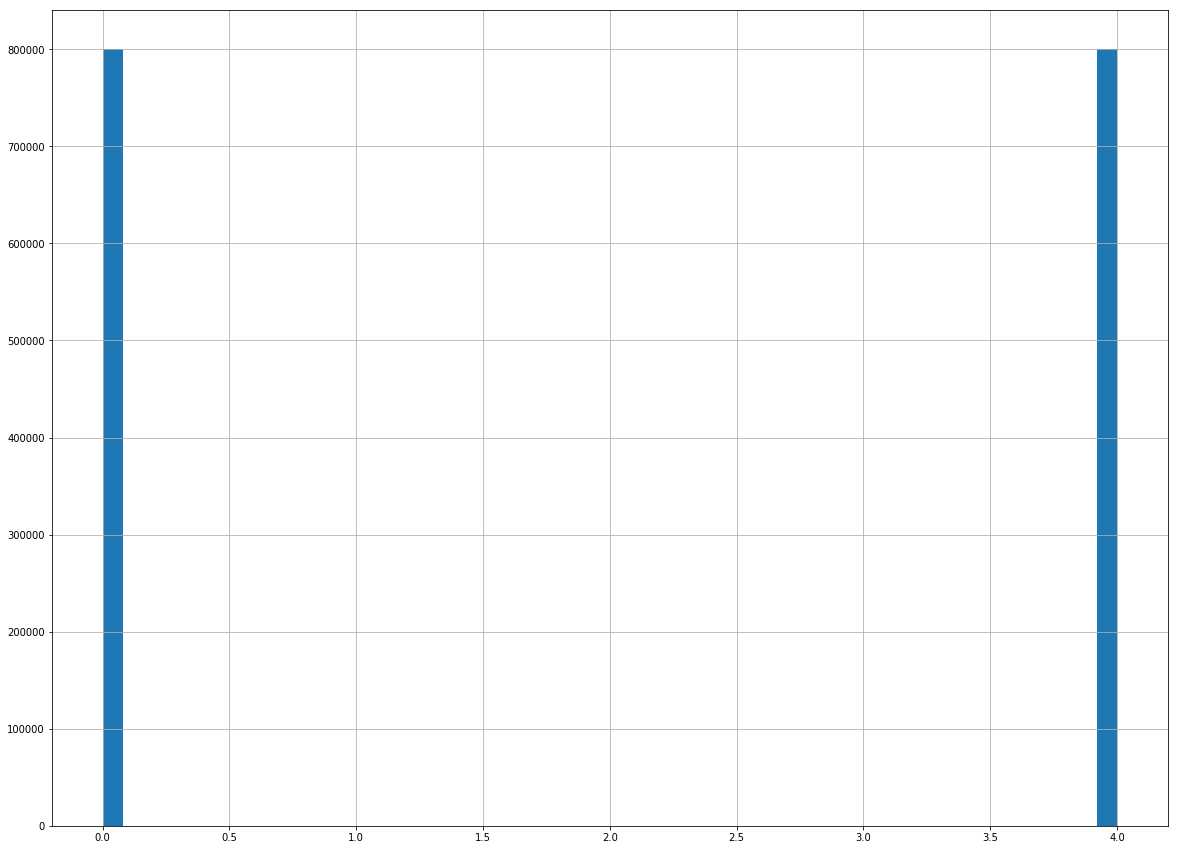

In [48]:
tweets['target'].hist(bins=50, figsize=(20,15))
plt.show()

In [49]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

tweets.target = tweets.target.apply(lambda x: decode_sentiment(x))

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.01, train_size=0.05, random_state=42)
for train_index, test_index in split.split(tweets, tweets['target']):
    train = tweets.loc[train_index]
    test = tweets.loc[test_index]

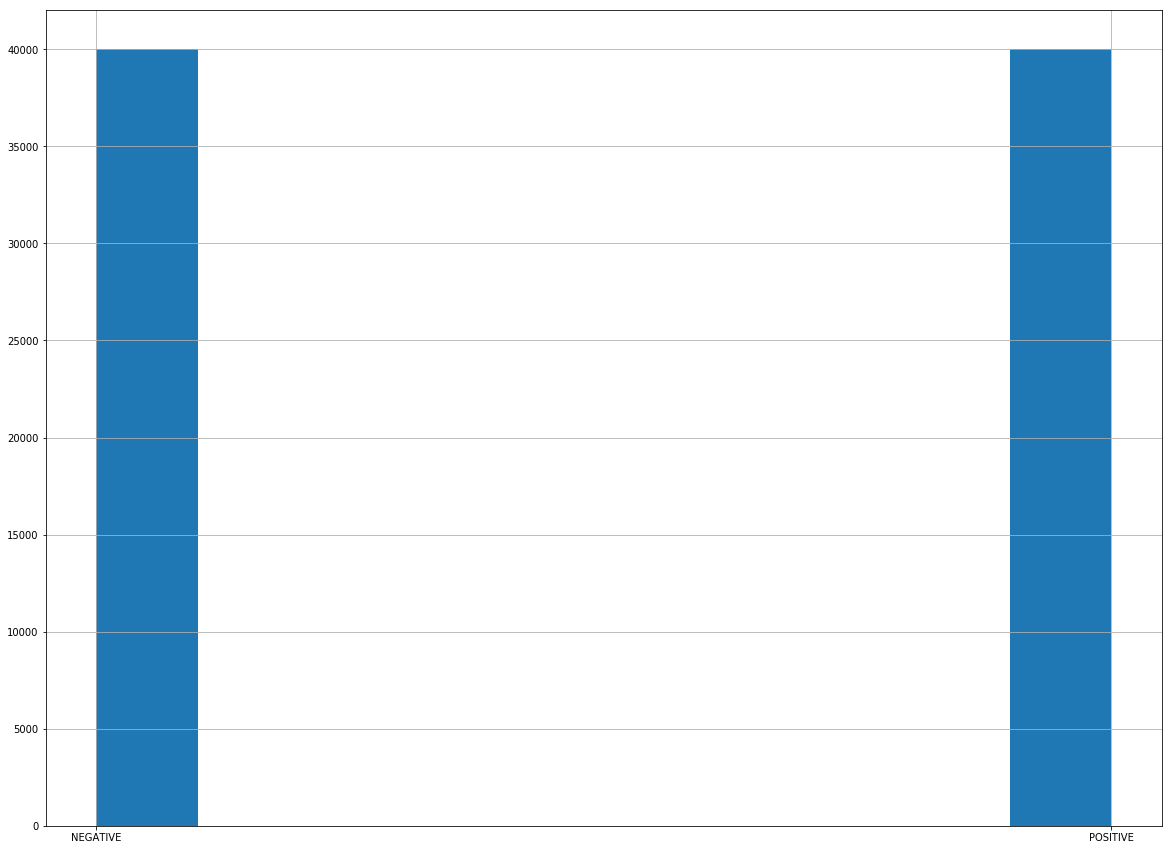

In [61]:
train['target'].hist(figsize=(20,15))
plt.show()

In [62]:
train = train.reset_index()
test = test.reset_index()
train.head()

index    target         ids                          date      flag  \
0   466543  NEGATIVE  2175585503  Mon Jun 15 01:24:27 PDT 2009  NO_QUERY   
1  1161605  POSITIVE  1979521342  Sun May 31 03:24:30 PDT 2009  NO_QUERY   
2  1045569  POSITIVE  1957564522  Fri May 29 00:53:57 PDT 2009  NO_QUERY   
3   856659  POSITIVE  1573786418  Tue Apr 21 02:51:12 PDT 2009  NO_QUERY   
4   462063  NEGATIVE  2174600305  Sun Jun 14 22:54:01 PDT 2009  NO_QUERY   

             user  \
0    PabloDelgado   
1   x_rachybear_x   
2  ginger_whinger   
3         AmpexUK   
4        AstoriaL   

                                                                                                 text  
0                                             I should still be sleeping / deberÃ­a seguir durmiendo   
1                                                  the sleepover was fun  and now im eating maltesers  
2  @jazzydacat good morning to you! Oh no, you've been mutilated!! Don't worry, they'll grow back...   
3                           have a track coming up on sendspace soon - keep watching for the link  xx  
4                                               @smallbrownbird   Wish I was there, or you were here.

In [63]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
documents_train = [TaggedDocument(list(train.loc[i,'text']),[i]) for i in range(0,train.shape[0])]
documents_test = [TaggedDocument(list(test.loc[i,'text']),[i]) for i in range(0,test.shape[0])]

In [64]:
model_train = Doc2Vec(documents_train, vector_size=50, window=8, min_count=1, sample=1e-4, negative=5, workers=cores,  dm=1, dm_concat=1 )
model_test = Doc2Vec(documents_test, vector_size=50, window=8, min_count=1, sample=1e-4, negative=5, workers=cores,  dm=1, dm_concat=1 )

In [80]:
type(model_train.docvecs)

gensim.models.keyedvectors.Doc2VecKeyedVectors

# RNN

In [68]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, InputLayer
from keras import utils

In [94]:
from sklearn.preprocessing import LabelEncoder
labels = train.target.unique().tolist()
labels.append('NEUTRAL')

encoder = LabelEncoder()
encoder.fit(train.target.tolist())

x_train = [model_train.docvecs[i] for i in range(0,train.shape[0])]
x_test = [model_test.docvecs[i] for i in range(0,test.shape[0])]

y_train = encoder.transform(train.target.tolist())
y_train = y_train.reshape(-1,1)

y_test = encoder.transform(test.target.tolist())
y_test = y_test.reshape(-1,1)

In [128]:
model = Sequential()
model.add(InputLayer(input_shape=[50]))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

ValueError: Input 0 is incompatible with layer lstm_4: expected ndim=3, found ndim=2

In [96]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [97]:
%%time
history = model.fit(np.array(x_train), np.array(y_train), epochs=10, batch_size=10)

Epoch 1/10
80000/80000 [==============================] - 10s 128us/step - loss: 0.6932 - acc: 0.5000
Epoch 2/10
80000/80000 [==============================] - 10s 122us/step - loss: 0.6931 - acc: 0.5022
Epoch 3/10
80000/80000 [==============================] - 9s 113us/step - loss: 0.6931 - acc: 0.5070
Epoch 4/10
80000/80000 [==============================] - 9s 113us/step - loss: 0.6931 - acc: 0.5056
Epoch 5/10
80000/80000 [==============================] - 9s 113us/step - loss: 0.6930 - acc: 0.5079
Epoch 6/10
80000/80000 [==============================] - 9s 116us/step - loss: 0.6931 - acc: 0.5051
Epoch 7/10
80000/80000 [==============================] - 9s 113us/step - loss: 0.6929 - acc: 0.5076
Epoch 8/10
80000/80000 [==============================] - 9s 112us/step - loss: 0.6929 - acc: 0.5076
Epoch 9/10
80000/80000 [==============================] - 9s 111us/step - loss: 0.6929 - acc: 0.5093
Epoch 10/10
80000/80000 [==============================] - 10s 120us/step - loss: 0.6929 

In [100]:
%%time
score = model.evaluate(np.array(x_test), np.array(y_test), batch_size=10)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

16000/16000 [==============================] - 1s 69us/step

ACCURACY: 0.4980000058282167
LOSS: 0.6933405417203903
CPU times: user 1.11 s, sys: 194 ms, total: 1.31 s
Wall time: 1.13 s


# Predict

In [123]:
s1 = ''
s1_tag = '001'

docs = []
docs.append(TaggedDocument(words=s1.split(), tags=[s1_tag]))
            
model_predict = Doc2Vec(docs, vector_size=50, window=2, min_count=1, sample=1e-4, negative=5, workers=cores,  dm=1, dm_concat=1)
model.predict(np.array([model_predict.docvecs[0]]))[0][0]

0.50301063